In [44]:

from matplotlib import pyplot as plt
from PIL import Image
from train import CNN
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import IPython
import cv2


In [45]:

classes = ['mask_weared_incorrect', 'with_mask', 'without_mask']


model_path = r'mask.pth'
image_path_1 = r'1.png'
image_path_2 = r'2.png'
image_path_3 = r'3.png'
image_path_4 = r'4.png'

model = CNN()
model.load_state_dict(torch.load(model_path, map_location=lambda storage, loc: storage))



      #
transform = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


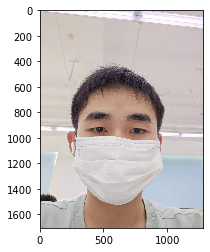

tensor([[-1.7796,  1.6483, -0.4110]], grad_fn=<AddmmBackward>)
with_mask


In [46]:
image = Image.open('1.png')

image = Image.open('1.png').convert('RGB')
image_torch = transform(image)
image_torch = image_torch.view(-1, 3, 128, 128)
plt.imshow(image)
plt.show()

#传入模型进行训练
output = model(image_torch)
print(output)
_, predicted = torch.max(output.data, dim=1)
print(classes[predicted[0].numpy()])

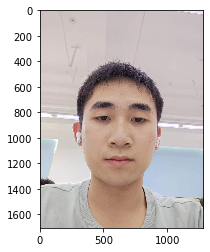

tensor([[-2.4407,  0.5599,  0.8841]], grad_fn=<AddmmBackward>)
without_mask


In [48]:


image2 = Image.open('2.png')
image2 = Image.open('2.png').convert('RGB')
without_mask = transform(image2)
without_mask = without_mask.view(-1, 3, 128, 128)
plt.imshow(image2)
plt.show()

#传入模型进行训练
output = model(without_mask)
print(output)
_, predicted = torch.max(output.data, dim=1)
print(classes[predicted[0].numpy()])

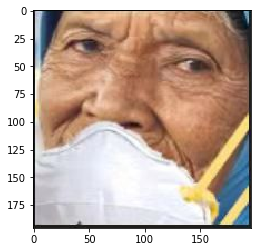

tensor([[ 1.2022,  4.9246, -4.5826]], grad_fn=<AddmmBackward>)
with_mask


In [51]:


image3 = Image.open('3.png')
image3 = Image.open('3.png').convert('RGB')
mask_weared_incorrect = transform(image3)
mask_weared_incorrect = mask_weared_incorrect.view(-1, 3, 128, 128)
plt.imshow(image3)
plt.show()

#传入模型进行训练
output = model(mask_weared_incorrect)
print(output)
_, predicted = torch.max(output.data, dim=1)
print(classes[predicted[0].numpy()])

## 任务4： 上传一张多人图片并进行口罩检测

In [52]:

image_show = cv2.imread("4.png",1)
image_show = cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB);



face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml'
)
#检测图像中的所有人脸
gray = cv2.cvtColor(image_show, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.15, 3, 0)


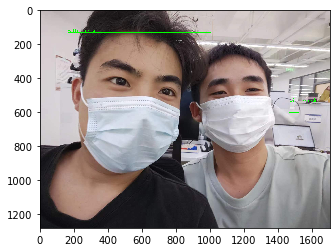

In [53]:
#遍历所有人脸
for (x,y,w,h) in faces:
    #对单张人脸的前置处理
    #传入模型进行预测
    item = image_show[y:y+h, x:x+w]
    cv2.imwrite("temp.png", item)
    image = Image.open("temp.png")
    image = image.convert('RGB')
    image_torch = transform(image)
    image_torch = image_torch.view(-1, 3, 128, 128)
    #判断预测结果并在图像中加框与文字
    output = model(image_torch)
    _, predicted = torch.max(output.data, dim=1)
    pred = predicted[0].numpy()
    
    if pred==0:
        cv2.rectangle(image_show,(x,y),(x+w,y+h),(255,255,0),2)
        cv2.putText(image_show,'mask_weared_incorrect',(x,y),cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,0), 2)
    elif pred==1:
        cv2.rectangle(image_show,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(image_show,'with_mask',(x,y),cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0), 2)
    elif pred==2:
        cv2.rectangle(image_show,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(image_show,'without_mask',(x,y),cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0), 2)
        
plt.imshow(image_show)
plt.show()